In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
driver_names = ['bus', 'passenger', 'taxi', 'truck']

In [3]:
bus_result = pd.read_csv('analysis_data\\test_bus_result.csv')
passenger_result = pd.read_csv('analysis_data\\test_passenger_result.csv')
taxi_result = pd.read_csv('analysis_data\\test_taxi_result.csv')
truck_result = pd.read_csv('analysis_data\\test_truck_result.csv')
total_result = pd.read_csv('analysis_data\\test_total_result.csv')

Text(50.722222222222214, 0.5, 'Ground Truth')

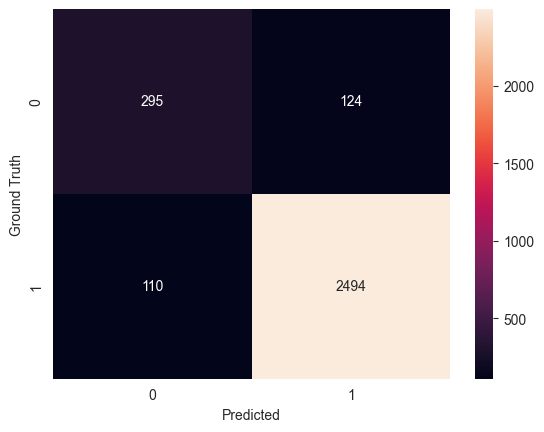

In [4]:
bus_cm = confusion_matrix(y_true=bus_result['label'], y_pred=bus_result['pred'])
sns.heatmap(bus_cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

In [11]:
print('acc: ', accuracy_score(y_true=bus_result['label'], y_pred=bus_result['pred']))
print('precision: ', precision_score(y_true=bus_result['label'], y_pred=bus_result['pred']))
print('recall: ', recall_score(y_true=bus_result['label'], y_pred=bus_result['pred']))
print('f1: ', f1_score(y_true=bus_result['label'], y_pred=bus_result['pred']))

acc:  0.9225934502150182
precision:  0.9526355996944232
recall:  0.9577572964669739
f1:  0.9551895825354271


Text(50.722222222222214, 0.5, 'Ground Truth')

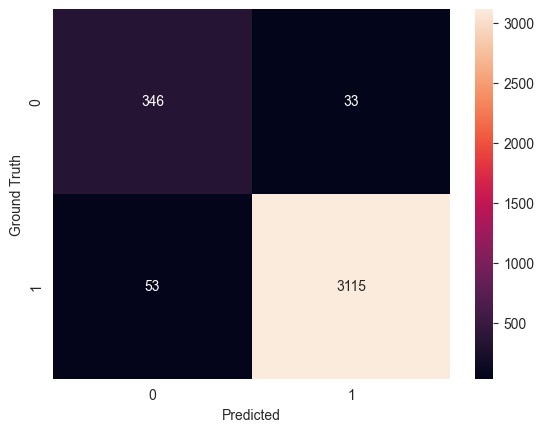

In [5]:
passenger_cm = confusion_matrix(y_true=passenger_result['label'], y_pred=passenger_result['pred'])
sns.heatmap(passenger_cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

In [12]:
print('acc: ', accuracy_score(y_true=passenger_result['label'], y_pred=passenger_result['pred']))
print('precision: ', precision_score(y_true=passenger_result['label'], y_pred=passenger_result['pred']))
print('recall: ', recall_score(y_true=passenger_result['label'], y_pred=passenger_result['pred']))
print('f1: ', f1_score(y_true=passenger_result['label'], y_pred=passenger_result['pred']))

acc:  0.9757541584437552
precision:  0.9895171537484116
recall:  0.983270202020202
f1:  0.9863837872070931


Text(50.722222222222214, 0.5, 'Ground Truth')

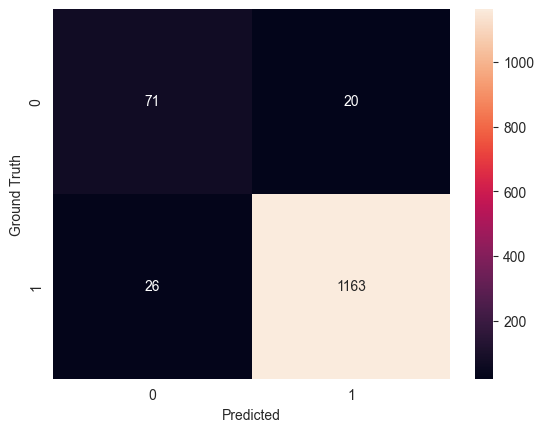

In [6]:
taxi_cm = confusion_matrix(y_true=taxi_result['label'], y_pred=taxi_result['pred'])
sns.heatmap(taxi_cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

In [13]:
print('acc: ', accuracy_score(y_true=taxi_result['label'], y_pred=taxi_result['pred']))
print('precision: ', precision_score(y_true=taxi_result['label'], y_pred=taxi_result['pred']))
print('recall: ', recall_score(y_true=taxi_result['label'], y_pred=taxi_result['pred']))
print('f1: ', f1_score(y_true=taxi_result['label'], y_pred=taxi_result['pred']))

acc:  0.9640625
precision:  0.9830938292476754
recall:  0.9781328847771237
f1:  0.9806070826306914


result of truck

Text(50.722222222222214, 0.5, 'Ground Truth')

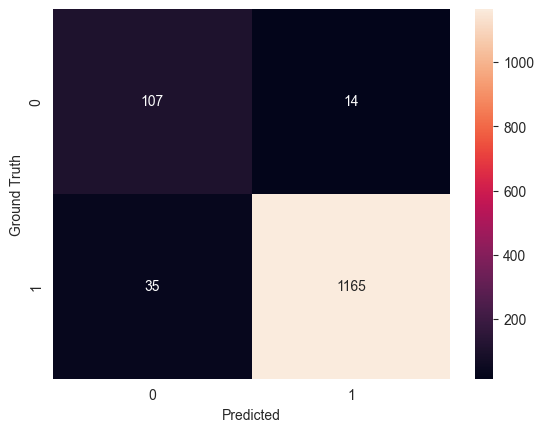

In [7]:
truck_cm = confusion_matrix(y_true=truck_result['label'], y_pred=truck_result['pred'])
sns.heatmap(truck_cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

In [14]:
print('acc: ', accuracy_score(y_true=truck_result['label'], y_pred=truck_result['pred']))
print('precision: ', precision_score(y_true=truck_result['label'], y_pred=truck_result['pred']))
print('recall: ', recall_score(y_true=truck_result['label'], y_pred=truck_result['pred']))
print('f1: ', f1_score(y_true=truck_result['label'], y_pred=truck_result['pred']))

acc:  0.9629068887206662
precision:  0.9881255301102629
recall:  0.9708333333333333
f1:  0.9794031105506517


Text(50.722222222222214, 0.5, 'Ground Truth')

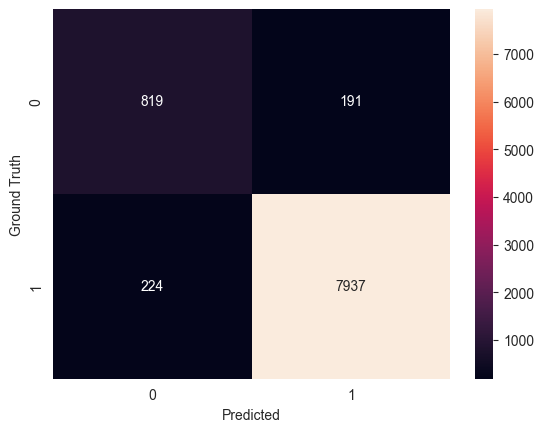

In [8]:
result_cm = confusion_matrix(y_true=total_result['label'], y_pred=total_result['pred'])
sns.heatmap(result_cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

In [15]:
print('acc: ', accuracy_score(y_true=total_result['label'], y_pred=total_result['pred']))
print('precision: ', precision_score(y_true=total_result['label'], y_pred=total_result['pred']))
print('recall: ', recall_score(y_true=total_result['label'], y_pred=total_result['pred']))
print('f1: ', f1_score(y_true=total_result['label'], y_pred=total_result['pred']))

acc:  0.9547486642678007
precision:  0.9765009842519685
recall:  0.972552383286362
f1:  0.9745226840198907
